In [1]:
import pandas as pd
import numpy as np

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
imgData = cv2.imread("../images/sparkkorea.jpg", cv2.IMREAD_COLOR)

In [6]:
# 가로, 세로 값이 바껴있다.
imgData.shape

(284, 586, 3)

In [7]:
cv2.imwrite("./aa.jpg", imgData)

True

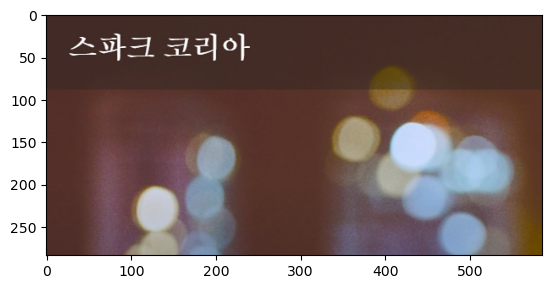

In [8]:
plt.imshow(imgData)

In [9]:
# 이미지가 저장된 경로를 파라미터로 받는다.
def showImg(imgPath):
    # 이미지 불러오기
    img = cv2.imread(imgPath, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(src=gray, dsize=(400, 200))
    cv2.imshow("sparkkorea", gray)
    # 키보드 입력 대기 (0: 무한대기, 이외 밀리세컨드)
    inputKey = cv2.waitKey(0)
    if inputKey == 27: # esc
        cv2.destroyAllWindows()
    elif inputKey == 26: # ctrl + z
        cv2.imwrite("./sparkkorea_out.jpg", gray)
        cv2.destroyAllWindows()
    else:
        cv2.destroyAllWindows()
    print(inputKey)

In [10]:
# 이미지 데이터를 파라미터로 받는다
def showImgData(inImg) : 
    cv2.namedWindow("window_title",  cv2.WINDOW_NORMAL)
    cv2.imshow("window title", imgData)
     # 키보드 입력 대기 (0: 무한대기, 이외 밀리세컨드)
    inputkey = cv2.waitKey(0)
    cv2.destroyAllWindows()

### 컬러 색상 바꾸기

In [11]:
imgDataGray = cv2.cvtColor(imgData, cv2.COLOR_BGR2GRAY)

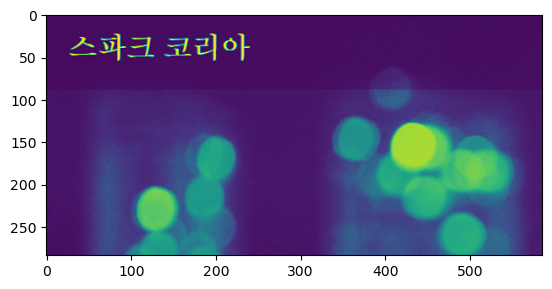

In [12]:
plt.imshow(imgDataGray)

In [13]:
### 이미지 사이즈 조절하기

In [14]:
img_H = 300
img_w = 160

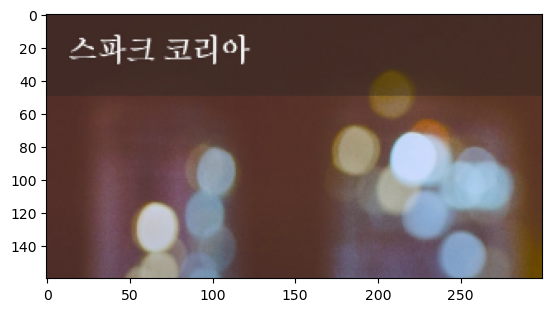

In [15]:
testImg = cv2.resize(imgData, (img_H,img_w))
plt.imshow(testImg)

In [62]:
# 사각형 그리기: cv2.rectangle(“이미지변수명”, (사각형 좌측상단 좌표), (사각형 우측하단 좌표), 색상, 굵기)
# 좌측상단과 우측하단의 좌표만 알면 된다
testImg = cv2.rectangle(imgData, 
             (20, 15), #좌측상단
             (245,60), #우측하단
             (0,255,255), 3)
# testImg에 변수 저장없이 사각형이 그려졌던건 함수 - showImgData때문에 내부에서 헷갈린 것으로 추정
showImgData(imgData)

In [63]:
showImgData(testImg)

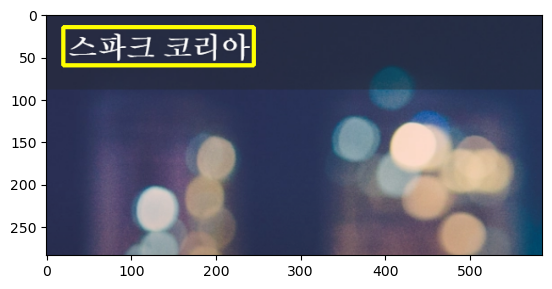

In [65]:
# bgr2rgb
testImg = cv2.cvtColor(testImg, cv2.COLOR_BGR2RGB)
plt.imshow(testImg)

In [56]:
# 이미지 불러오기 및 크기 조절
sampleImg = cv2.imread("../images/sparkkorea.jpg")
resizedImg = cv2.resize(src=sampleImg, dsize=(img_H,img_w))
# 불러온 이미지 내 사각형 그리기
cv2.putText( resizedImg,   
            "spark",
            (20, 55),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (0,255,255),
            3)
showImgData(resizedImg)

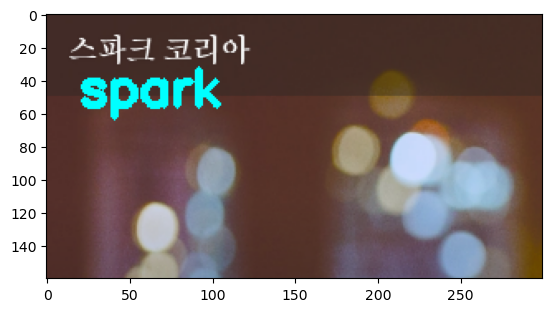

In [57]:
plt.imshow(resizedImg)

In [58]:
showImgData(resizedImg)

# 비디오 불러오기

In [23]:
cap = cv2.VideoCapture("../images/sample_video.mp4")

In [24]:
while(cap.isOpened):
    ret, frame = cap.read()
    # ret : 영상이 끝날때까지 True
    # frame : 영상의 이미지
    if ret :
        cv2.imshow("video", frame)
        # 33ms 30fps = 1000ms/30frame -> 1000/30 = 33
        inputKey = cv2.waitKey(33)
        if inputKey == 27 : 
            break
        if inputKey == 32 :
            print("space bar")
            cv2.imwrite("./sparkVideo.jpg",frame)
            # 1. 이미지 전처리(학습패턴 상태랑 동일하게 전처리 frame)
            # 2. 모델예측
            # 3. cv2.puttext(예측결과를 frame에다가 put)
            # 4. 
    else : 
        break
cap.release()
cv2.destroyAllWindows()